In [167]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression

#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import RandomForestClassifier

# grid search
from sklearn.model_selection import GridSearchCV

# advanced algorthms
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#ignore warning
import warnings
warnings.filterwarnings("ignore")

In [169]:
# load data
cl = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
cl.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [170]:
# Looking for data type
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [171]:
# looking for null values in the dataset
cl.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Decriptive Analysis and Data Visualization

In [172]:
# to check outliers
cl.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [173]:
# Pivot talbe for output thus those less chance of heart attack and more chance of heart attack.
cl.groupby(['output']).size()

output
0    138
1    165
dtype: int64

<AxesSubplot:xlabel='output'>

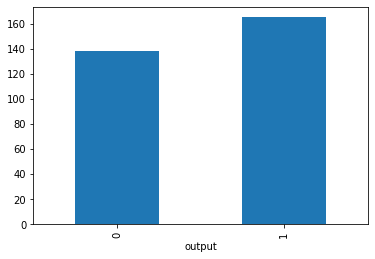

In [174]:
# plot for output
cl.groupby(['output']).size().plot(kind='bar')

In [175]:
cl.groupby(['output', 'sex']).size()

output  sex
0       0       24
        1      114
1       0       72
        1       93
dtype: int64

In [176]:
cl.groupby(['output', 'fbs']).size()

output  fbs
0       0      116
        1       22
1       0      142
        1       23
dtype: int64

In [177]:
cl.groupby(['output', 'slp']).size()

output  slp
0       0       12
        1       91
        2       35
1       0        9
        1       49
        2      107
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='output'>

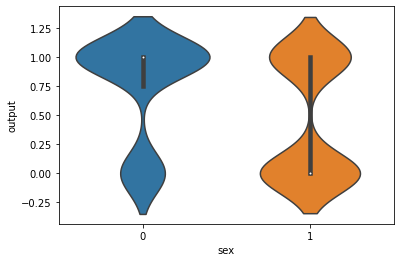

In [178]:
# data visualisation for output and age
sns.violinplot(x="sex", y="output", data=cl)

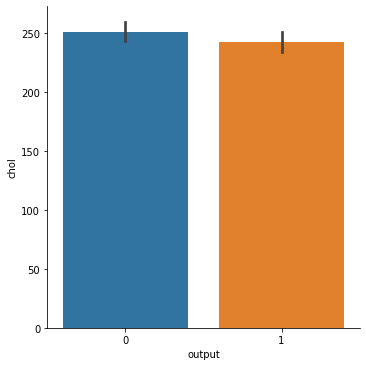

In [179]:
# data visualisation for output and chol
sns.catplot("output", "chol", data=cl, kind='bar')

# Exploratory Analysis

In [180]:
# Correlation Analysis without Dummies
cl.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Correlation Analysis with dummies

In [181]:
cl.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [182]:
cl_1 = pd.get_dummies(cl, columns=['output', 'cp', 'restecg', 'sex'])
cl_1.head()

,age,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,...,output_1,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,sex_0,sex_1
0,63,145,233,1,150,0,2.3,0,0,1,...,1,0,0,0,1,1,0,0,0,1
1,37,130,250,0,187,0,3.5,0,0,2,...,1,0,0,1,0,0,1,0,0,1
2,41,130,204,0,172,0,1.4,2,0,2,...,1,0,1,0,0,1,0,0,1,0
3,56,120,236,0,178,0,0.8,2,0,2,...,1,0,1,0,0,0,1,0,0,1
4,57,120,354,0,163,1,0.6,2,0,2,...,1,1,0,0,0,0,1,0,1,0


In [183]:
cl_1=cl_1.corr()
cl_1

,age,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,...,output_1,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,sex_0,sex_1
age,1.000000,0.279351,0.213678,0.121308,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,...,-0.225439,0.138253,-0.147399,-0.059432,0.047516,0.141398,-0.160654,0.084621,0.098447,-0.098447
trtbps,0.279351,1.000000,0.123174,0.177531,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,...,-0.144931,0.021447,-0.081851,-0.045107,0.151343,0.133249,-0.146576,0.058635,0.056769,-0.056769
chol,0.213678,0.123174,1.000000,0.013294,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,...,-0.085239,0.070684,-0.012750,-0.037918,-0.050589,0.166565,-0.174394,0.034615,0.197912,-0.197912
fbs,0.121308,0.177531,0.013294,1.000000,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,...,-0.028046,-0.060190,-0.060649,0.083679,0.055511,0.077405,-0.066344,-0.048305,-0.045032,0.045032
thalachh,-0.398522,-0.046698,-0.009940,-0.008567,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,...,0.421741,-0.376561,0.248317,0.165475,0.079082,-0.073953,0.101512,-0.120870,0.044020,-0.044020
exng,0.096801,0.067616,0.067023,0.025665,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,...,-0.436757,0.469061,-0.233863,-0.271028,-0.093384,0.084059,-0.093776,0.042729,-0.141664,0.141664
oldpeak,0.210013,0.193216,0.053952,0.005747,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,...,-0.430696,0.280243,-0.277513,-0.132444,0.086959,0.100141,-0.138486,0.168172,-0.096093,0.096093
slp,-0.168814,-0.121475,-0.004038,-0.059894,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,...,0.345877,-0.216056,0.202807,0.109769,-0.064509,-0.125618,0.153431,-0.122080,0.030711,-0.030711
caa,0.276326,0.101389,0.070511,0.137979,-0.213177,0.115739,0.222682,-0.080155,1.000000,0.151832,...,-0.391724,0.218226,-0.134715,-0.088998,-0.070496,0.082679,-0.089642,0.030660,-0.118261,0.118261
thall,0.068001,0.062210,0.098803,-0.032019,-0.096439,0.206754,0.210244,-0.104764,0.151832,1.000000,...,-0.344029,0.207277,-0.126204,-0.110714,-0.024692,-0.000963,0.014505,-0.059326,-0.210041,0.210041


<AxesSubplot:>

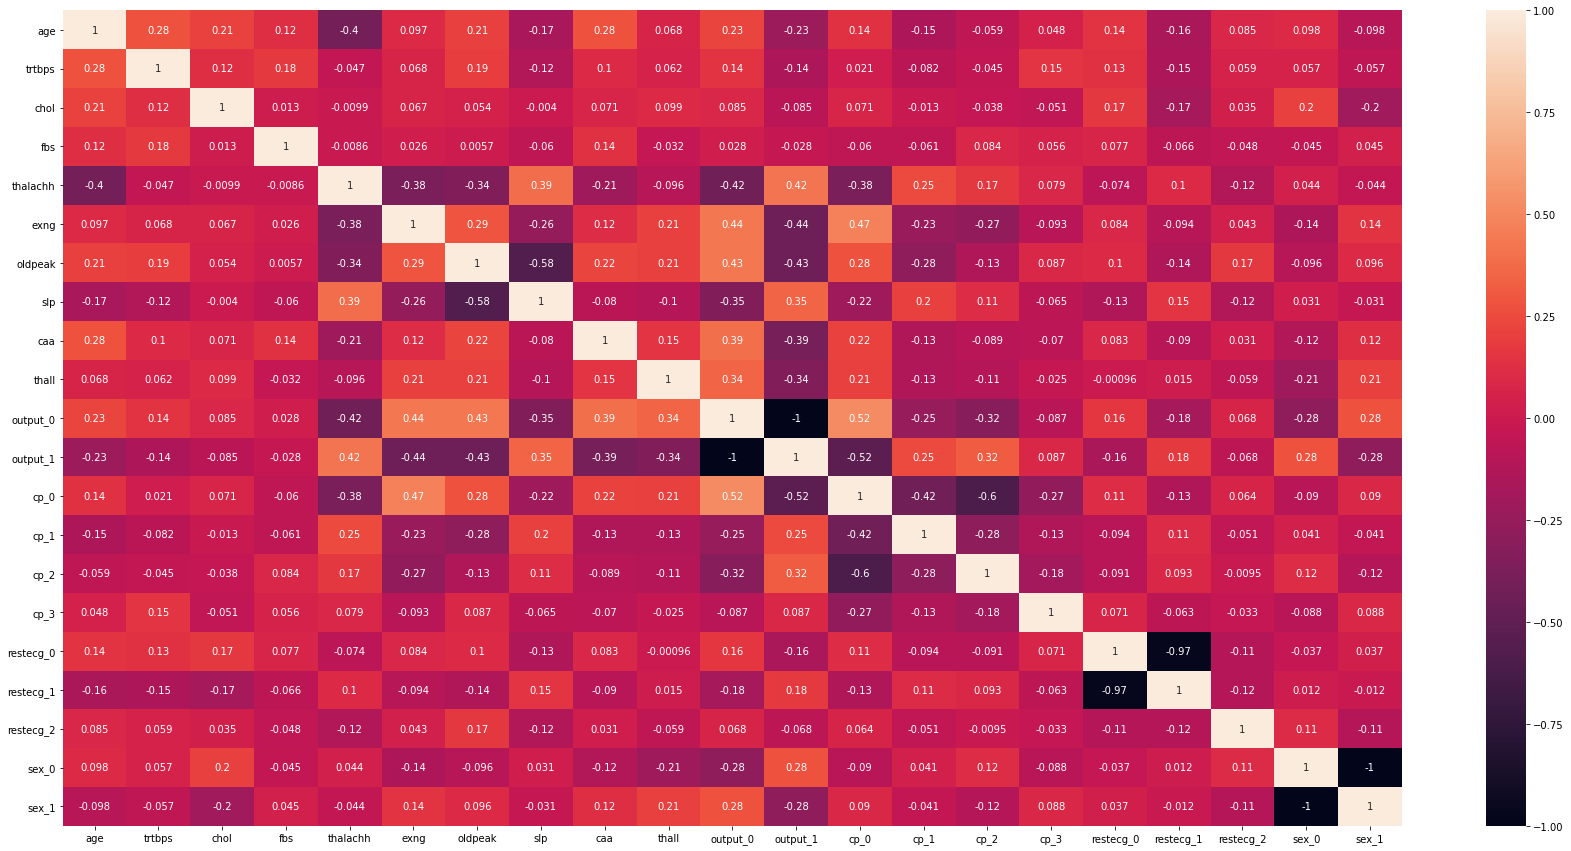

In [184]:
# Heat Map
fig = plt.figure(figsize = (30,15))
sns.heatmap(cl_1, annot = True)

## First of all we need to explain the positives and negatives associated with the numbers obtained.
- Positive Correlation; A positive correlation is a relationship between 2 variables which the increase of one variable causes an increase for another variable.
- Negative Correlation; The Negative correlation is the opposite, it’s a relationship between 2 variables which the increase of one variable causes a decrease for another variable. This applies otherwise.
- From our correlation analysis, we can see age has AGE has a positive weak correlation with output_0 (less chance of heart attack). This means that as age increase the more likely there is a chance of heart attack and vice versa.
- We can also see that AGE has a negative weak correlation with output_1 (more chance of heart attack). This means that the lower the age the patient will not have more chance of a heat attack and vice versa.

# Statistical inference


In [185]:
import scipy.stats as stats
# T-test for clients who is less likely or more likely in relation to age if their mean values are the same
no = cl[cl['output'] == 0]['age']
yes = cl[cl['output'] == 1]['age']

stats.ttest_ind(no, yes)

Ttest_indResult(statistic=4.014560975148874, pvalue=7.524801303442373e-05)

- Null hypothesis says two means are almost same.
- p-value is a probability if the null hypothesis is true. A high p-value (> 0.05) means we can't reject the null hypothesis
- Since we have a low p-value, we reject the null hypothesis that output and age are the same in terms of painthreshold (No difference)

In [186]:
# T-test for clients who is less likely or more likely in relation to cp if their mean values are the same
no = cl[cl['output'] == 0]['cp']
yes = cl[cl['output'] == 1]['cp']

stats.ttest_ind(no, yes)

Ttest_indResult(statistic=-8.352979797236767, pvalue=2.4697121089225667e-15)

- Null hypothesis says two means are almost same.
- p-value is a probability if the null hypothesis is true. A high p-value (> 0.05) means we can't reject the null hypothesis
- Since we have a low p-value, we reject the null hypothesis that output and cp are the same in terms of painthreshold (No difference)

In [187]:
# T-test for clients who is less likely or more likely in relation to thalachh if their mean values are the same
no = cl[cl['output'] == 0]['thalachh']
yes = cl[cl['output'] == 1]['thalachh']

stats.ttest_ind(no, yes)

Ttest_indResult(statistic=-8.069702869452568, pvalue=1.697337638656049e-14)

- Null hypothesis says two means are almost same.
- p-value is a probability if the null hypothesis is true. A high p-value (> 0.05) means we can't reject the null hypothesis
- Since we have a low p-value, we reject the null hypothesis that output and thalachh are the same in terms of painthreshold (No difference)

In [188]:
# T-test for clients who is less likely or more likely in relation to exng if their mean values are the same
no = cl[cl['output'] == 0]['exng']
yes = cl[cl['output'] == 1]['exng']

stats.ttest_ind(no, yes)

Ttest_indResult(statistic=8.423327027748353, pvalue=1.5208138383313965e-15)

- Null hypothesis says two means are almost same.
- p-value is a probability if the null hypothesis is true. A high p-value (> 0.05) means we can't reject the null hypothesis
- Since we have a low p-value, we reject the null hypothesis that output and exng are the same in terms of painthreshold (No difference)

# Model Building

In [189]:
# looking for unique variables
cl.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [190]:
## Categorical to Dummy Variables
cl =  pd.get_dummies(cl, columns=["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"],
                         prefix=["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"],
                         drop_first=True)
cl.head(2)

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [191]:
### c. checking for p-value (TESTING FOR STATISTICAL SIGNIFICANCE OF INDEPENDENT VARIABLES)
import scipy.stats as stats
cl_corr = pd.DataFrame() # Correlation matrix
cl_p = pd.DataFrame() # Matrix of p-values
for x in cl.columns:   # assuming cl as your dataframe name
   for y in cl.columns:
      corr = stats.pearsonr(cl[x], cl[y])
      cl_corr.loc[x,y] = corr[0]
      cl_p.loc[x,y] = corr[1]

cl_p['output']

age          7.524801e-05
trtbps       1.154606e-02
chol         1.387903e-01
thalachh     1.697338e-14
oldpeak      4.085346e-15
output       0.000000e+00
sex_1        6.678692e-07
cp_1         1.498284e-05
cp_2         1.735460e-08
cp_3         1.309784e-01
fbs_1        6.267775e-01
restecg_1    2.191648e-03
restecg_2    2.351175e-01
exng_1       1.520814e-15
slp_1        8.142433e-11
slp_2        1.068761e-12
caa_1        4.409069e-05
caa_2        1.280668e-06
caa_3        2.220536e-04
caa_4        2.488996e-01
thall_1      6.388288e-02
thall_2      4.356225e-23
thall_3      2.241269e-19
Name: output, dtype: float64

### At 0.05 level of significance to test the statistical significance of the X variables, chol, caa_4, thall_1, cp_3 and others are not statistically significant whiles the rest of X variables are statistically significant using the p-value. This is to test our three hypothesis.
### Our null hypthesis is X variables (independent) are not statistically significant in predicting output (dependent variable). We will fail to reject the null hypothesis if the p-value for our x variables are greater than significant level 0.05.
### The p-values of some X variables such as age, thalachh, thall_3 and others are all less than the 0.05 significant level therefore we reject the null hypothesis and that they are all statistically significant in predicting the dependent variable output.

# Using variables that are statistically significant for model selection

In [192]:
# Assigning dataset into dependent (y_1) and independent (X_1)
y_1 = cl['output']
X_1 = cl.drop(['output', 'chol', 'cp_3', 'fbs_1', 'restecg_2', 'caa_4', 'thall_1'], axis=1)

In [193]:
# Normalizing all features
from sklearn import preprocessing
X_1 = preprocessing.StandardScaler().fit(X_1).transform(X_1)
X_1[0:5]

array([[ 0.9521966 ,  0.76395577,  0.01544279,  1.08733806,  0.68100522,
        -0.44455422, -0.63464776, -1.00330579, -0.69663055, -0.92676626,
        -0.93914194, -0.52259855, -0.37867694, -0.26584089, -1.10076284,
        -0.79311554],
       [-1.91531289, -0.09273778,  1.63347147,  2.12257273,  0.68100522,
        -0.44455422,  1.57567719,  0.9967051 , -0.69663055, -0.92676626,
        -0.93914194, -0.52259855, -0.37867694, -0.26584089,  0.9084609 ,
        -0.79311554],
       [-1.47415758, -0.09273778,  0.97751389,  0.31091206, -1.46841752,
         2.24944438, -0.63464776, -1.00330579, -0.69663055, -0.92676626,
         1.06480177, -0.52259855, -0.37867694, -0.26584089,  0.9084609 ,
        -0.79311554],
       [ 0.18017482, -0.66386682,  1.23989692, -0.20670527,  0.68100522,
         2.24944438, -0.63464776,  0.9967051 , -0.69663055, -0.92676626,
         1.06480177, -0.52259855, -0.37867694, -0.26584089,  0.9084609 ,
        -0.79311554],
       [ 0.29046364, -0.66386682,  0

In [194]:
# Splitting data into 70/30. 70% trained dataset and 30% test dataset
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, train_size = 0.7, random_state =100)

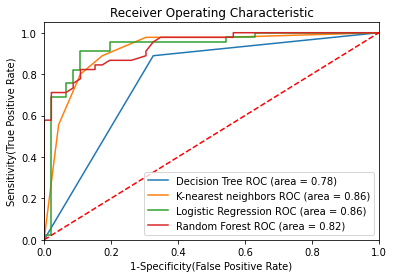

In [195]:
## Best model selection
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'K-nearest neighbors',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver='lbfgs', max_iter=20000),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=100),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_1_train, y_1_train) # train the model
    #y_pred=model.predict(X_1_test) # predict the test data
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_1_test, model.predict_proba(X_1_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_1_test,model.predict(X_1_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

# From our analysis, logistic regression came out on top with 86% using ROC.

In [196]:
# Assigning dataset into dependent (y) and independent (x)
y = cl['output']
X = cl.drop(['output'], axis=1)

In [197]:
# Normalizing all features
from sklearn import preprocessing
X_2 = preprocessing.StandardScaler().fit(X).transform(X)
X_2[0:5]

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806,
         0.68100522, -0.44455422, -0.63464776,  3.4891135 ,  2.394438  ,
        -1.00330579, -0.11566299, -0.69663055, -0.92676626, -0.93914194,
        -0.52259855, -0.37867694, -0.26584089, -0.12953194,  3.97911213,
        -1.10076284, -0.79311554],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273,
         0.68100522, -0.44455422,  1.57567719, -0.28660575, -0.41763453,
         0.9967051 , -0.11566299, -0.69663055, -0.92676626, -0.93914194,
        -0.52259855, -0.37867694, -0.26584089, -0.12953194, -0.25131234,
         0.9084609 , -0.79311554],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206,
        -1.46841752,  2.24944438, -0.63464776, -0.28660575, -0.41763453,
        -1.00330579, -0.11566299, -0.69663055, -0.92676626,  1.06480177,
        -0.52259855, -0.37867694, -0.26584089, -0.12953194, -0.25131234,
         0.9084609 , -0.79311554],
       [ 0.18017482

In [198]:
# Splitting data into 70/30. 70% trained dataset and 30% test dataset
X_train, X_test, y_train, y_test = train_test_split(X_2, y, train_size = 0.7, random_state =100)

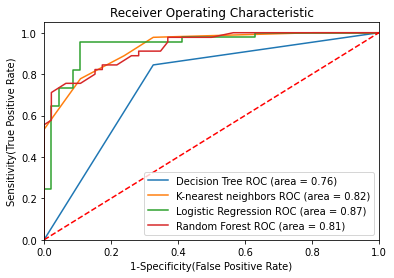

In [199]:
# Model Selection
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'K-nearest neighbors',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver='lbfgs', max_iter=20000),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=100),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    #y_pred=model.predict(X_test) # predict the test data
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

# From our analysis, logistic regression came out on top with 87% using ROC.

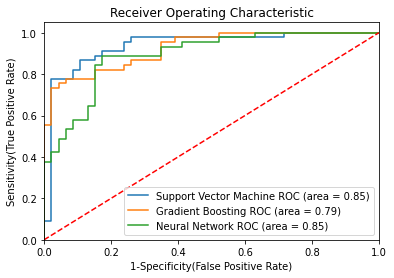

In [200]:
# Model Selection for advance classification algorithms
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Support Vector Machine',
    'model': SVC(gamma='auto', probability=True),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
},
{
    'label': 'Neural Network',
    'model': MLPClassifier(solver='lbfgs', max_iter=15000),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    #y_pred=model.predict(X_test) # predict the test data
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

# From our analysis, Support Vector Machine came out on top with 85% using ROC.

In [201]:
# using Logistic Regression
lr = LogisticRegression(solver='lbfgs', max_iter=20000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
# print coefficients
coef = pd.DataFrame(list(zip(X.columns, np.transpose(lr.coef_))), 
             columns=['X variables', 'coef']).sort_values('coef', ascending=False)

coef['coef'] = coef['coef'].str[0]
coef

,X variables,coef
7,cp_2,0.949515
8,cp_3,0.450728
20,thall_2,0.383048
14,slp_2,0.374143
3,thalachh,0.357761
0,age,0.328431
6,cp_1,0.194003
10,restecg_1,0.133013
19,thall_1,0.128819
18,caa_4,0.127353


In [202]:
### As we can see, the highest positive coefficient or weight is cp_2 and the highest negative coefficient is caa_1.

In [203]:
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.8681318681318682
[[36 10]
 [ 2 43]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86        46
           1       0.81      0.96      0.88        45

    accuracy                           0.87        91
   macro avg       0.88      0.87      0.87        91
weighted avg       0.88      0.87      0.87        91

0.8690821256038649


In [204]:
# 10 fold cross validation evaluation
scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=20000), X_test, y_test, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.9        1.         1.         0.77777778 1.         0.88888889
 1.         0.88888889 0.66666667 0.88888889]
0.9011111111111111


In [205]:
# probability of heart attack
probs = lr.predict_proba(X_test)
probs[0:20]
#1st column: probability of less chance of heart attack
#2nd column: probabiility of more chance of heart attack

array([[0.01463362, 0.98536638],
       [0.99078682, 0.00921318],
       [0.99576986, 0.00423014],
       [0.03323862, 0.96676138],
       [0.28893101, 0.71106899],
       [0.97972525, 0.02027475],
       [0.94754619, 0.05245381],
       [0.9583974 , 0.0416026 ],
       [0.21394839, 0.78605161],
       [0.41772147, 0.58227853],
       [0.93093735, 0.06906265],
       [0.2251599 , 0.7748401 ],
       [0.92282198, 0.07717802],
       [0.15460648, 0.84539352],
       [0.92288136, 0.07711864],
       [0.4011616 , 0.5988384 ],
       [0.93488754, 0.06511246],
       [0.9636012 , 0.0363988 ],
       [0.94302677, 0.05697323],
       [0.37940499, 0.62059501]])

In [206]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)    #building 100 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8571428571428571

In [207]:
# Evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.8571428571428571
[[36 10]
 [ 3 42]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.85        46
           1       0.81      0.93      0.87        45

    accuracy                           0.86        91
   macro avg       0.87      0.86      0.86        91
weighted avg       0.87      0.86      0.86        91



In [208]:
# 10 fold cross validation evaluation
scores = cross_val_score(RandomForestClassifier(), X_test, y_test, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.9        1.         0.77777778 0.77777778 0.88888889 0.88888889
 1.         0.88888889 0.66666667 0.88888889]
0.8677777777777778


In [209]:
# another method
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
oldpeak,0.115392
thalachh,0.110786
thall_3,0.102242
age,0.090819
thall_2,0.086406
chol,0.085776
trtbps,0.083577
caa_1,0.043764
exng_1,0.043017
sex_1,0.037142


- The 5 most important features are oldpeak, thalachh, thall_3, chol and trtbps.

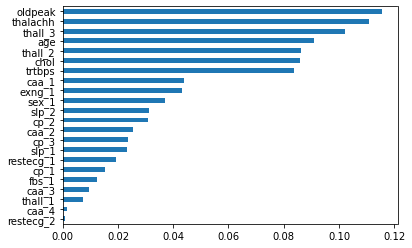

In [210]:
# Visualization for the most important features.
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=True).plot(kind='barh', 
                                                                                                            legend=None);

In [211]:
#Support Vector Machine (SVM)
svm = SVC(gamma='auto', probability=True)
svm.fit(X_train, y_train)

SVC(gamma='auto', probability=True)

In [212]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, svm.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, svm.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, svm.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, svm.predict(X_test)))

0.8461538461538461
--------------------------------------------------------
[[34 12]
 [ 2 43]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.74      0.83        46
           1       0.78      0.96      0.86        45

    accuracy                           0.85        91
   macro avg       0.86      0.85      0.84        91
weighted avg       0.86      0.85      0.84        91

--------------------------------------------------------
0.8473429951690822


In [213]:
# 10-fold cross-validation
svm = SVC(gamma='auto')

scores = cross_val_score(svm, X_test, y_test, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.8        1.         0.88888889 0.77777778 1.         0.66666667
 1.         0.88888889 0.66666667 0.88888889]
0.8577777777777778


# Model Deployment
- We going to employ the logistic regression model since it gave as the highest prediction.
- Also, the whole dataset is going to used for out model deployment.

In [214]:
# Logistic Regression
y_predict = lr.predict(X_2)
y_predict[0:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [215]:
# probability of heart attack
probs_new = lr.predict_proba(X_2)
probs_new[0:20]
#1st column: probability of less chance of heart attack
#2nd column: probabiility of more chance of heart attack

array([[0.13447603, 0.86552397],
       [0.11906394, 0.88093606],
       [0.03751069, 0.96248931],
       [0.04688928, 0.95311072],
       [0.06081678, 0.93918322],
       [0.28091429, 0.71908571],
       [0.14798283, 0.85201717],
       [0.28893101, 0.71106899],
       [0.09553601, 0.90446399],
       [0.01226393, 0.98773607],
       [0.14381137, 0.85618863],
       [0.00742983, 0.99257017],
       [0.07816021, 0.92183979],
       [0.10487014, 0.89512986],
       [0.01317799, 0.98682201],
       [0.01892791, 0.98107209],
       [0.0038799 , 0.9961201 ],
       [0.04147285, 0.95852715],
       [0.21394839, 0.78605161],
       [0.12698571, 0.87301429]])

In [216]:
# Evaluation Metrics
print(metrics.accuracy_score(y, lr.predict(X_2)))
print(metrics.confusion_matrix(y, lr.predict(X_2)))
print(metrics.classification_report(y, lr.predict(X_2)))
print(metrics.roc_auc_score(y, lr.predict(X_2)))

0.8910891089108911
[[114  24]
 [  9 156]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.87       138
           1       0.87      0.95      0.90       165

    accuracy                           0.89       303
   macro avg       0.90      0.89      0.89       303
weighted avg       0.89      0.89      0.89       303

0.8857707509881422


In [217]:
# 10 fold cross validation evaluation
scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=20000), X_2, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.90322581 0.90322581 0.83870968 0.93333333 0.83333333 0.83333333
 0.83333333 0.9        0.76666667 0.83333333]
0.8578494623655913


# Evaluation of prediction to original output

In [218]:
from sklearn.metrics import f1_score
f1_score(y, y_predict, average='weighted') 

# The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. 
# It is a good way to show that a classifer has a good value for both recall and precision.
# And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.89 in our case.

0.8903271136708875

In [219]:
from sklearn.metrics import jaccard_score
jaccard_score(y, y_predict,pos_label=1) 
# Lets try jaccard index for accuracy evaluation. 
# we can define jaccard as the size of the intersection divided by the size of the union of two label sets. 
# If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

0.8253968253968254

In [220]:
from sklearn.metrics import log_loss
log_loss(y, probs_new) # This probability is a value between 0 and 1. 
                      # Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

0.31631552445563316

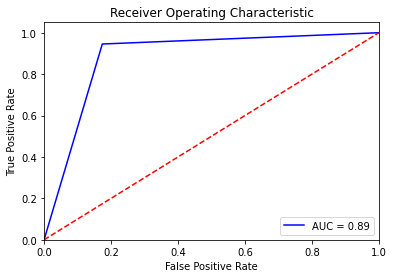

In [221]:
# ROC
preds = lr.predict_proba(X_2)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, y_predict)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()